In [46]:
# Import libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, roc_auc_score, accuracy_score, classification_report


# Define file paths and load data
combined_data_w_target_file_path = '../processed-data/combined_data_w_target.csv'
combined_data_w_target = pd.read_csv(combined_data_w_target_file_path)
pd.set_option('display.max_columns', None)
# Check
combined_data_w_target.sample(5)

,Player,Age,Season,Team,tGP,tW,tL,tW%,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,TS%,eFG%,EFF,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos_PG,Pos_SG,Pos_SF,Pos_PF,Pos_C,SMOY_Winner,SMOY_Nom,prev_Nom,Awards
6107,Pete Myers,32.0,1995,CHO,82,41,41,0.500,32.0,1.0,14.2,0.9,2.7,33.333333,0.1,0.5,20.000000,0.8,2.2,36.363636,1.0,1.4,71.428571,43.727382,35.185185,13.437500,0.4,1.7,2.1,1.5,0.6,0.2,0.8,1.8,2.9,0,1,0,0,0,0,0,0,No Awards
20596,P.J. Washington,24.0,2022,CHO,82,27,55,0.329,73.0,73.0,32.6,5.9,13.4,44.029851,2.0,5.9,33.898305,3.9,7.5,52.000000,1.7,2.4,70.833333,54.302712,51.492537,20.958904,1.0,3.9,4.9,2.4,0.9,1.1,1.5,2.6,15.7,0,0,0,1,0,0,0,0,No Awards
21675,Karl-Anthony Towns,29.0,2024,NYK,82,16,66,0.195,21.0,21.0,33.8,9.0,17.0,52.941176,2.3,5.2,44.230769,6.7,11.8,56.779661,4.9,5.7,85.964912,64.588887,59.705882,152.380952,2.9,10.3,13.2,3.0,0.8,0.9,2.3,3.3,25.2,0,0,0,0,1,0,0,0,No Awards
16616,Henry Ellenson,20.0,2016,DET,82,37,45,0.451,19.0,2.0,7.7,1.2,3.4,35.294118,0.5,1.8,27.777778,0.7,1.5,46.666667,0.2,0.4,50.000000,44.742729,42.647059,15.263158,0.4,1.7,2.2,0.4,0.1,0.1,0.7,0.3,3.2,0,0,0,1,0,0,0,0,No Awards
17037,Caleb Swanigan,20.0,2017,POR,82,49,33,0.598,27.0,3.0,7.0,0.9,2.2,40.909091,0.0,0.3,0.000000,0.9,1.9,47.368421,0.4,0.7,57.142857,45.853270,40.909091,10.370370,0.6,1.4,2.0,0.5,0.2,0.1,0.7,1.4,2.3,0,0,0,1,0,0,0,0,No Awards


In [47]:
features = ['Age',
            'tGP',
            'tW',
            'tL',
            'tW%',
            'G',
            'GS',
            'MP',
            'FG',
            'FGA',
            'FG%',
            '3P',
            '3PA',
            '3P%',
            '2P',
            '2PA',
            '2P%',
            'FT',
            'FTA',
            'FT%',
            'TS%',
            'eFG%',
            'EFF',
            'ORB',
            'DRB',
            'TRB',
            'AST',
            'STL',
            'BLK',
            'TOV',
            'PF',
            'PTS',
            'Pos_PG',
            'Pos_SG',
            'Pos_SF',
            'Pos_PF',
            'Pos_C',
            'prev_Nom'
            ]
# Use SMOY_Nom as the target
target = ['SMOY_Nom']

# Filter the data based on the season
train_data = combined_data_w_target[combined_data_w_target['Season'] < 2023]  # Data from 1980 to 2022
test_data = combined_data_w_target[combined_data_w_target['Season'] == 2023]  # Data from 2023

# Prepare X (features) and y (target variable)
X_train = train_data[features]
y_train = train_data['SMOY_Nom']  # Update target variable

X_test = test_data[features]
y_test = test_data['SMOY_Nom']  # Update target variable

In [48]:
# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (X_train and y_train) to balance the class distribution
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print(f"\nClass distribution in y_train_resampled: {y_train_resampled.value_counts()}")

# Initialize Dummy Classifier with stratified strategy (to handle class imbalance better)
dummy_clf = DummyClassifier(strategy='stratified')

# Train the model on the resampled data
dummy_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the 2023 test set
y_pred = dummy_clf.predict(X_test)

# Get the predicted probabilities for the positive class (SMOY nominee, class 1)
y_pred_proba = dummy_clf.predict_proba(X_test)[:, 1]  # Probabilities for class '1'

# Printing out evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

# Check class distribution in y_test
print(f"\nClass distribution in y_test: {y_test.value_counts()}")



Class distribution in y_train_resampled: SMOY_Nom
0    20543
1    20543
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.51      0.68       652
           1       0.01      0.60      0.02         5

    accuracy                           0.51       657
   macro avg       0.50      0.56      0.35       657
weighted avg       0.99      0.51      0.67       657

ROC-AUC Score: 0.548

Class distribution in y_test: SMOY_Nom
0    652
1      5
Name: count, dtype: int64


Accuracy of 0.51 means the model is correct about half of the time, which is a bit better than a coinflip. This is likely because there are very few SMOY nominees compared to all other players(5 to about 600+)

Recall of .50 for class 0 means that the model has a coinflip chance to guess if a player is not a SMOY Nominee. Recall of 0.80 for class 1 means the model is identifying 80% of the SMOY nominees. While okay (about a coin flip), could still improve.

ROC-AUC score of 0.44 shows that the model is slightly worse than a coin flip when it comes to determining SMOY from Non-SMOY candidates

In [49]:
# Get the predicted probabilities for the positive class (SMOY nominee, class 1)
y_pred_proba = dummy_clf.predict_proba(X_test)[:, 1]

# Add the predicted probabilities to the test data
test_data_with_proba = test_data.copy()
test_data_with_proba['SMOY_Prob'] = y_pred_proba
# Sort by the predicted probabilities in descending order and get the top 5 candidates
pred_top_5 = test_data_with_proba.sort_values(by='SMOY_Prob', ascending=False).head(5)
# Display the top 5 candidates
pred_top_5[['Player','Team', 'Age', 'PTS', 'GS', 'G', 'tW%', 'eFG%', 'prev_Nom','SMOY_Prob']]

,Player,Team,Age,PTS,GS,G,tW%,eFG%,prev_Nom,SMOY_Prob
21064,Jordan Goodwin,PHO,25.0,5.0,0.0,40.0,0.598,45.833333,0,1.0
21079,Josh Richardson,MIA,30.0,9.9,6.0,43.0,0.561,53.703704,0,1.0
21096,Karl-Anthony Towns,MIN,28.0,21.8,62.0,62.0,0.683,57.516340,0,1.0
21095,Kaiser Gates,NOP,27.0,0.0,0.0,1.0,0.598,0.000000,0,1.0
21092,Jusuf Nurkić,PHO,29.0,10.9,76.0,76.0,0.598,52.409639,0,1.0


Intial Analysis shows issues shows issues with the predicted candidates shows problems with:

- Games Started: Some players are over the 40 game threshold (are starters, not bench players)
- SMOY Probabilty: The probability being one is almost certainly wrong as I will show below with the actual candidates



In [50]:
# Filter the test_data for the specified players
actual_top_5_list = ['Naz Reid', 'Malik Monk', 'Bobby Portis', 'Norman Powell', 'Bogdan Bogdanović']
actual_top_5 = test_data[test_data['Player'].isin(actual_top_5_list)]
# Sort the filtered players by the order in the actual_top_5 list
actual_top_5 = actual_top_5.set_index('Player').loc[actual_top_5_list].reset_index()
# Display the selected columns in the correct order
actual_top_5[['Player', 'Team', 'Age', 'PTS', 'GS', 'G', 'tW%', 'eFG%', 'prev_Nom']]


,Player,Team,Age,PTS,GS,G,tW%,eFG%,prev_Nom
0,Naz Reid,MIN,24.0,13.5,14.0,81.0,0.683,57.619048,0
1,Malik Monk,SAC,25.0,15.4,0.0,72.0,0.561,52.822581,1
2,Bobby Portis,MIL,28.0,13.8,4.0,82.0,0.598,56.250000,1
3,Norman Powell,LAC,30.0,13.9,3.0,76.0,0.622,59.405941,1
4,Bogdan Bogdanović,ATL,31.0,16.9,33.0,79.0,0.439,53.956835,0


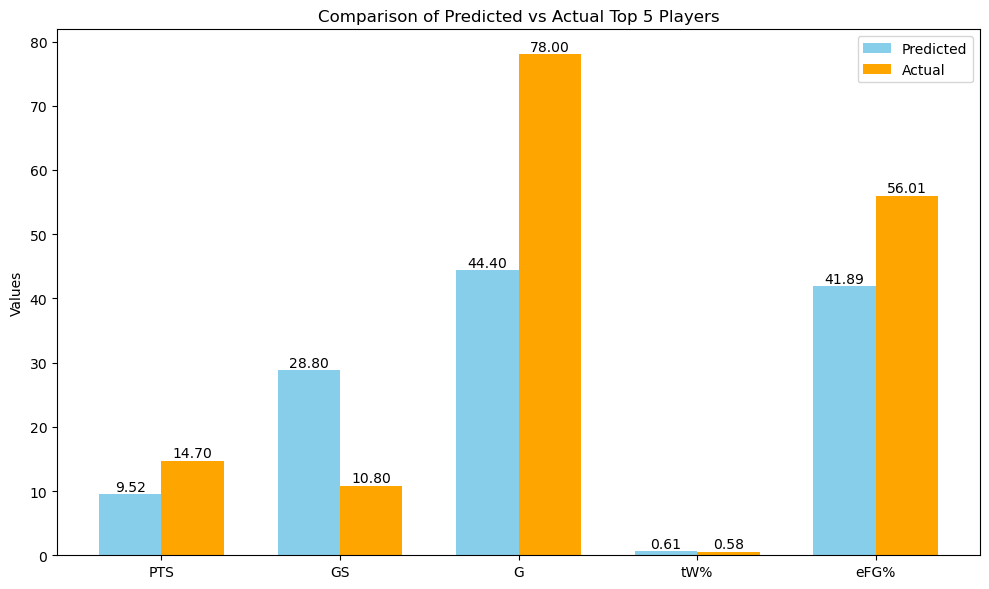

In [51]:
# Define the data for the plot
categories = ['PTS', 'GS', 'G', 'tW%', 'eFG%']
x = np.arange(len(categories))

# Predicted values
predicted = [
    pred_top_5[categories[0]].mean(),
    pred_top_5[categories[1]].mean(),
    pred_top_5[categories[2]].mean(),
    pred_top_5[categories[3]].mean(),
    pred_top_5[categories[4]].mean()
]

# Actual values
actual = [
    actual_top_5[categories[0]].mean(),
    actual_top_5[categories[1]].mean(),
    actual_top_5[categories[2]].mean(),
    actual_top_5[categories[3]].mean(),
    actual_top_5[categories[4]].mean()
]

# Plot configuration
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots
ax.bar(x - width / 2, predicted, width, label='Predicted', color='skyblue')
ax.bar(x + width / 2, actual, width, label='Actual', color='orange')

# Add labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('Comparison of Predicted vs Actual Top 5 Players')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Annotate bar values
for i, (pred_val, act_val) in enumerate(zip(predicted, actual)):
    ax.text(i - width / 2, pred_val + 0.1, f'{pred_val:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    ax.text(i + width / 2, act_val + 0.1, f'{act_val:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


[TEMP]

In [52]:
# Random Forest Classifier

# Initialize the Random Forest Classifier with balanced class weights
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, max_depth=10)

# Train the model on the resampled data
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the 2023 test set
y_pred = rf_clf.predict(X_test)

# Get the predicted probabilities for the positive class (SMOY nominee, class 1)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]  # Probabilities for class '1'

# Printing out evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

# Check class distribution in y_test
print(f"\nClass distribution in y_test: {y_test.value_counts()}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       652
           1       0.36      1.00      0.53         5

    accuracy                           0.99       657
   macro avg       0.68      0.99      0.76       657
weighted avg       1.00      0.99      0.99       657

ROC-AUC Score: 0.995

Class distribution in y_test: SMOY_Nom
0    652
1      5
Name: count, dtype: int64


Accuracy of 0.99 means the model is correct 99% of the time, but this is misleading because the dataset is highly imbalanced, with only 5 SMOY nominees compared to 652 non-SMOY players. The model mostly predicts non-SMOY players, inflating the accuracy.

Recall of 0.99 for class 0 (Non-SMOY Nominees) shows the model is good at identifying non-SMOY players. Recall of 1.00 for class 1 (SMOY Nominees) means the model correctly identifies all SMOY nominees, but since there are only 5, this isn’t a big achievement.

Precision of 0.36 for class 1 (SMOY Nominees) indicates that many non-SMOY players are incorrectly classified as SMOY nominees.

ROC-AUC score of 0.995 means the model can effectively distinguish between SMOY and non-SMOY nominees, but this score is influenced by the imbalance, and doesn't necessarily show strong overall performance.

In [53]:
# Get the predicted probabilities for the positive class (SMOY nominee, class 1)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# Add the predicted probabilities to the test data
test_data_with_proba_rf = test_data.copy()
test_data_with_proba_rf['SMOY_Prob'] = y_pred_proba_rf

# Sort by the predicted probabilities in descending order and get the top 5 candidates
pred_top_5_rf = test_data_with_proba_rf.sort_values(by='SMOY_Prob', ascending=False).head(5)

# Display the top 5 candidates
pred_top_5_rf[['Player','Team', 'Age', 'PTS', 'GS', 'G', 'tW%', 'eFG%', 'prev_Nom', 'SMOY_Prob']]


,Player,Team,Age,PTS,GS,G,tW%,eFG%,prev_Nom,SMOY_Prob
21165,Malik Monk,SAC,25.0,15.4,0.0,72.0,0.561,52.822581,1,0.968831
20817,Caris LeVert,CLE,29.0,14.0,10.0,68.0,0.585,48.760331,0,0.968206
21216,Naz Reid,MIN,24.0,13.5,14.0,81.0,0.683,57.619048,0,0.853405
20837,Cole Anthony,ORL,23.0,11.6,0.0,81.0,0.573,49.468085,0,0.851248
21228,Norman Powell,LAC,30.0,13.9,3.0,76.0,0.622,59.405941,1,0.824426


In [54]:
# Filter the test_data for the specified players
actual_top_5_list = ['Naz Reid', 'Malik Monk', 'Bobby Portis', 'Norman Powell', 'Bogdan Bogdanović']
actual_top_5 = test_data[test_data['Player'].isin(actual_top_5_list)]
# Sort the filtered players by the order in the actual_top_5 list
actual_top_5 = actual_top_5.set_index('Player').loc[actual_top_5_list].reset_index()
# Display the selected columns in the correct order
actual_top_5[['Player', 'Team', 'Age', 'PTS', 'GS', 'G', 'tW%', 'eFG%', 'prev_Nom']]

,Player,Team,Age,PTS,GS,G,tW%,eFG%,prev_Nom
0,Naz Reid,MIN,24.0,13.5,14.0,81.0,0.683,57.619048,0
1,Malik Monk,SAC,25.0,15.4,0.0,72.0,0.561,52.822581,1
2,Bobby Portis,MIL,28.0,13.8,4.0,82.0,0.598,56.250000,1
3,Norman Powell,LAC,30.0,13.9,3.0,76.0,0.622,59.405941,1
4,Bogdan Bogdanović,ATL,31.0,16.9,33.0,79.0,0.439,53.956835,0


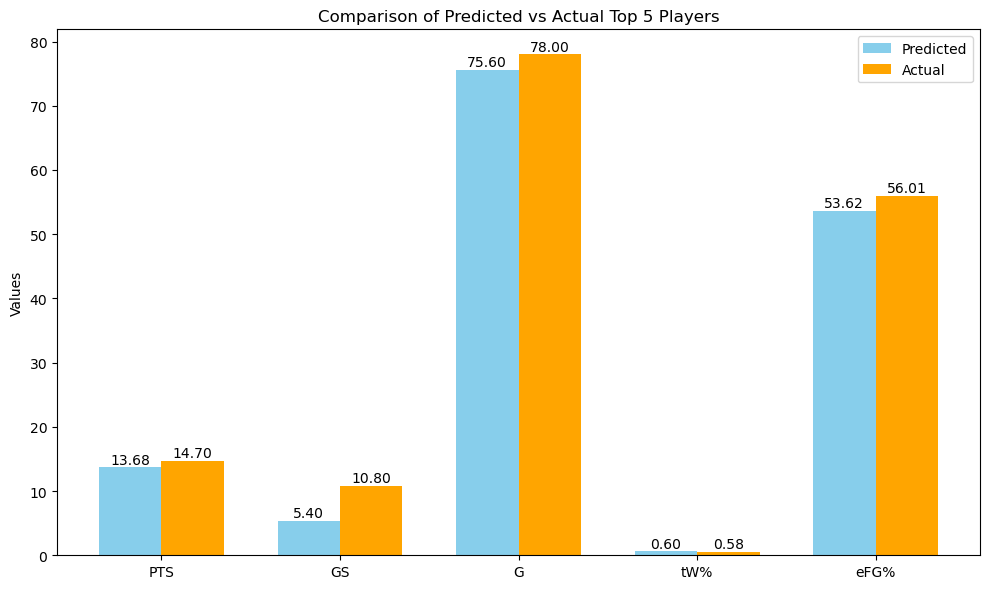

In [55]:
# Define the data for the plot
categories = ['PTS', 'GS', 'G', 'tW%', 'eFG%']
x = np.arange(len(categories))

# Predicted values for the top 5 players
predicted = [
    pred_top_5_rf[categories[0]].mean(),
    pred_top_5_rf[categories[1]].mean(),
    pred_top_5_rf[categories[2]].mean(),
    pred_top_5_rf[categories[3]].mean(),
    pred_top_5_rf[categories[4]].mean()
]

# Actual values for the top 5 players
actual = [
    actual_top_5[categories[0]].mean(),
    actual_top_5[categories[1]].mean(),
    actual_top_5[categories[2]].mean(),
    actual_top_5[categories[3]].mean(),
    actual_top_5[categories[4]].mean()
]

# Plot configuration
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots
ax.bar(x - width / 2, predicted, width, label='Predicted', color='skyblue')
ax.bar(x + width / 2, actual, width, label='Actual', color='orange')

# Add labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('Comparison of Predicted vs Actual Top 5 Players')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Annotate bar values
for i, (pred_val, act_val) in enumerate(zip(predicted, actual)):
    ax.text(i - width / 2, pred_val + 0.1, f'{pred_val:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    ax.text(i + width / 2, act_val + 0.1, f'{act_val:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

# CONCLUSIONS

## DATASETS
- ### Data processing and size was consequential for this project, especially with the imbalance of class for my task of top 5 winner selection. Features added onto the original dataset such as EFF, eFG%, and tW% all helped improve the model.

## MODEL
- ### Choice of model vastly impacted the effectiveness of predictions made by the models. While I did use SMOTE to oversample the minority class (SMOY Nominees), the technique did prove it's effectiveness when used with a more appropiate model for my task (RFC) cpmpared to the DummyClassifier

## RESULTs
- ### The DummyClassifier did not even remotely predict correctly for SMOY candidates, which is expected due to the imbalanced dataset and DummyClassifier being a simple baseline model. The Random Forest Classifier was much more effective at predicting, it was able to get 3 out 5 of the actual candidates from the SMOY award in the 2023 season (Malik Monk, Norman Powell, and Naz Reid)